In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
D = 2
K = 3
X = np.zeros((N*K, D))
y = np.zeros(N*K, dtype='uint8')

for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j


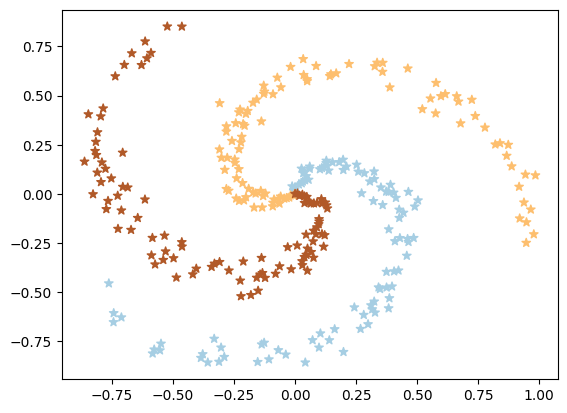

iteration 0: loss 1.098588
iteration 1000: loss 0.291802
iteration 2000: loss 0.254411
iteration 3000: loss 0.243036
iteration 4000: loss 0.241744
iteration 5000: loss 0.241469
iteration 6000: loss 0.241276
iteration 7000: loss 0.241125
iteration 8000: loss 0.241035
iteration 9000: loss 0.241004
training accuracy: 0.98


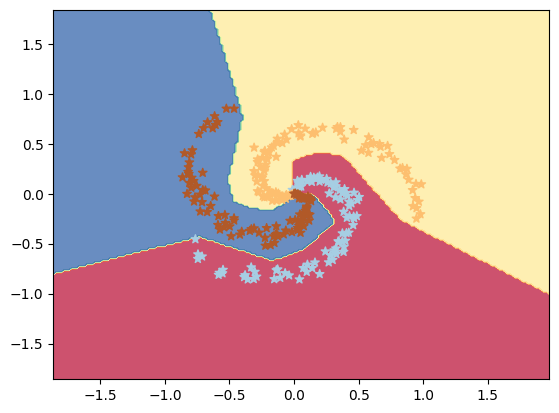

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 数据生成
N = 100
D = 2
K = 3
X = np.zeros((N*K, D))
y = np.zeros(N*K, dtype='uint8')

for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

# 可视化数据集
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Paired, marker='*')
plt.show()

# 神经网络参数初始化
h = 100
W1 = 0.01 * np.random.randn(D, h)
b1 = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))
step_size = 1e-0
reg = 1e-3
num_examples = X.shape[0]

# 训练神经网络
for i in range(10000):
    # Forward pass
    hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
    scores = np.dot(hidden_layer, W2) + b2

    # Compute probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Compute loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W1 * W1) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss

    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # Backward pass
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    # Backprop into W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)

    # Backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    dhidden[hidden_layer <= 0] = 0

    # Backprop into W1 and b1
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # Add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W1

    # Parameter updates
    W1 -= step_size * dW
    b1 -= step_size * db
    W2 -= step_size * dW2
    b2 -= step_size * db2

# 训练完成后，评估准确率并绘制决策边界
hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

# 可视化决策边界
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Paired, marker='*')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()